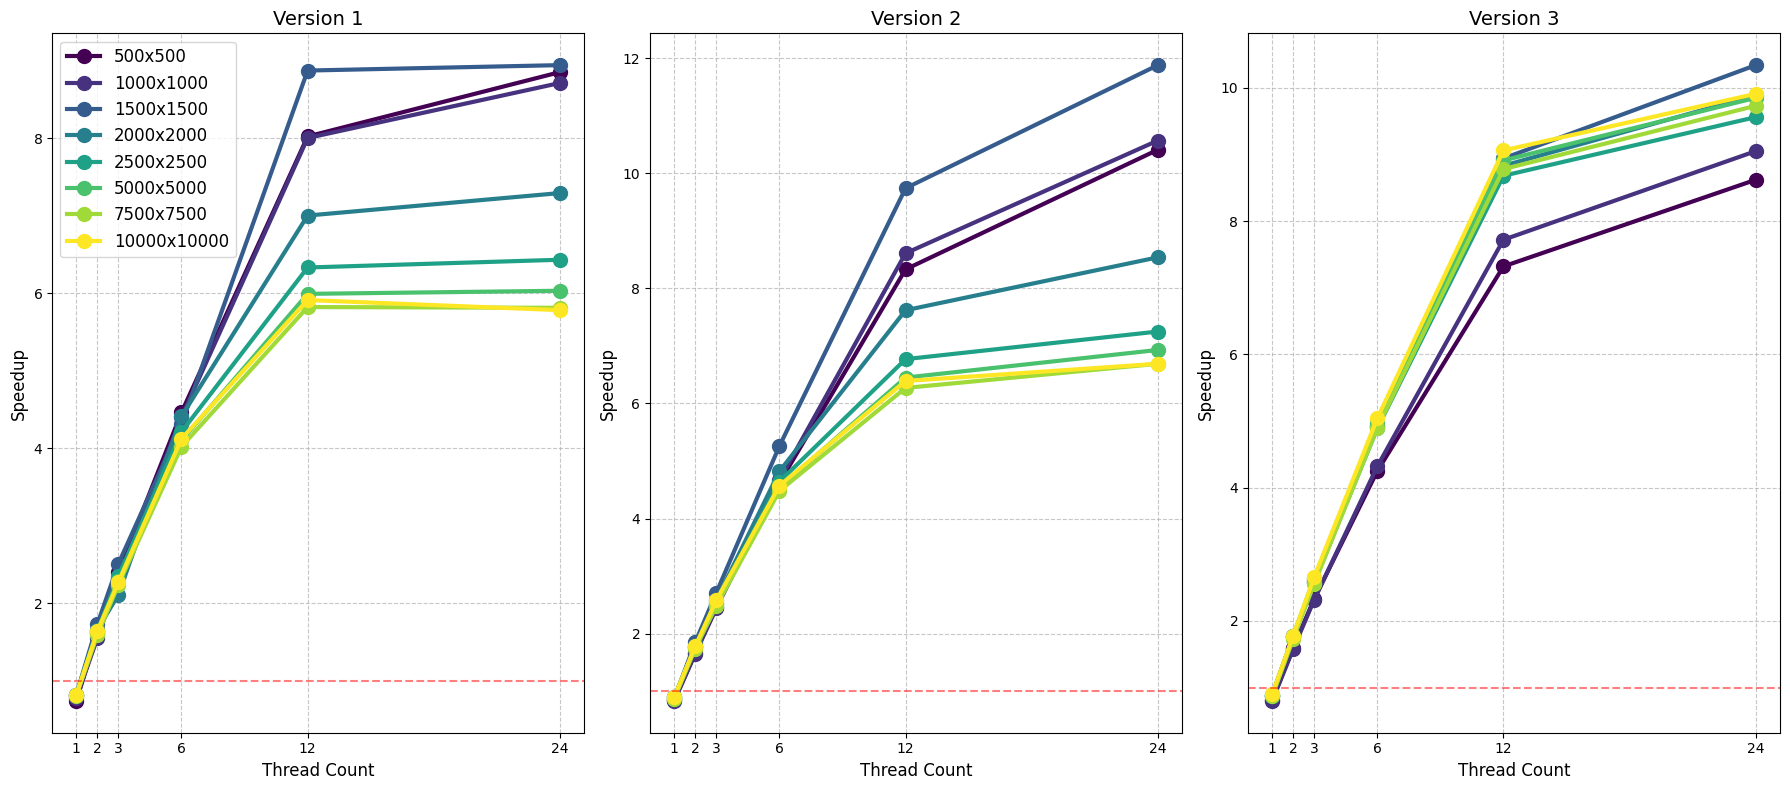

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
df = pd.read_csv('laplace_performance_gpu1.csv')

# Filter out the Sequential implementation
df_parallel = df[df['Implementation'] != 'Sequential']

# Define colors and markers for implementations
colors = {'v1': '#1f77b4', 'v2': '#ff7f0e', 'v3': '#2ca02c'}
markers = {'v1': 'o', 'v2': 's', 'v3': '^'}

# Create a figure with two subplots - one for overall view, one for matrix size comparison
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 8))

# === SUBPLOT 1: Matrix size comparison (using only best implementation v3) ===
matrix_sizes = sorted(df_parallel['Matrix_Size'].unique())
colors_matrix = plt.cm.viridis(np.linspace(0, 1, len(matrix_sizes)))
for i, matrix_size in enumerate(matrix_sizes):
    data = df_parallel[(df_parallel['Matrix_Size'] == matrix_size) & 
                      (df_parallel['Implementation'] == 'v1')]
    
    ax1.plot(data['Thread_Count'], data['Speedup'], 
            marker='o', 
            color=colors_matrix[i],
            linewidth=3,
            markersize=10,
            label=f"{matrix_size}x{matrix_size}")

ax1.set_xlabel('Thread Count', fontsize=12)
ax1.set_ylabel('Speedup', fontsize=12)
ax1.set_title(f'Version 1', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_xticks([1, 2, 3, 6, 12, 24])
ax1.legend(loc='upper left', fontsize=12)
# === SUBPLOT 2: Matrix size comparison (using only best implementation v3) ===
matrix_sizes = sorted(df_parallel['Matrix_Size'].unique())
colors_matrix = plt.cm.viridis(np.linspace(0, 1, len(matrix_sizes)))
for i, matrix_size in enumerate(matrix_sizes):
    data = df_parallel[(df_parallel['Matrix_Size'] == matrix_size) & 
                      (df_parallel['Implementation'] == 'v2')]
    
    ax2.plot(data['Thread_Count'], data['Speedup'], 
            marker='o', 
            color=colors_matrix[i],
            linewidth=3,
            markersize=10,
            label=f"{matrix_size}x{matrix_size}")

ax2.set_xlabel('Thread Count', fontsize=12)
ax2.set_ylabel('Speedup', fontsize=12)
ax2.set_title(f'Version 2', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_xticks([1, 2, 3, 6, 12, 24])
#ax2.legend(loc='upper left', fontsize=12)
# === SUBPLOT 3: Matrix size comparison (using only best implementation v3) ===
matrix_sizes = sorted(df_parallel['Matrix_Size'].unique())
colors_matrix = plt.cm.viridis(np.linspace(0, 1, len(matrix_sizes)))
for i, matrix_size in enumerate(matrix_sizes):
    data = df_parallel[(df_parallel['Matrix_Size'] == matrix_size) & 
                      (df_parallel['Implementation'] == 'v3')]
    
    ax3.plot(data['Thread_Count'], data['Speedup'], 
            marker='o', 
            color=colors_matrix[i],
            linewidth=3,
            markersize=10,
            label=f"{matrix_size}x{matrix_size}")

ax3.set_xlabel('Thread Count', fontsize=12)
ax3.set_ylabel('Speedup', fontsize=12)
ax3.set_title(f'Version 3', fontsize=14)
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.set_xticks([1, 2, 3, 6, 12, 24])
#ax3.legend(loc='upper left', fontsize=12)

# Add a horizontal line at y=1 (sequential baseline)
ax1.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Sequential Baseline')
ax2.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Sequential Baseline')
ax3.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Sequential Baseline')
# Create a separate legend outside the plot area
fig.tight_layout()
# Save the figure
plt.savefig('all-up-to-v3,png', dpi=300, bbox_inches='tight')


Plot saved successfully!


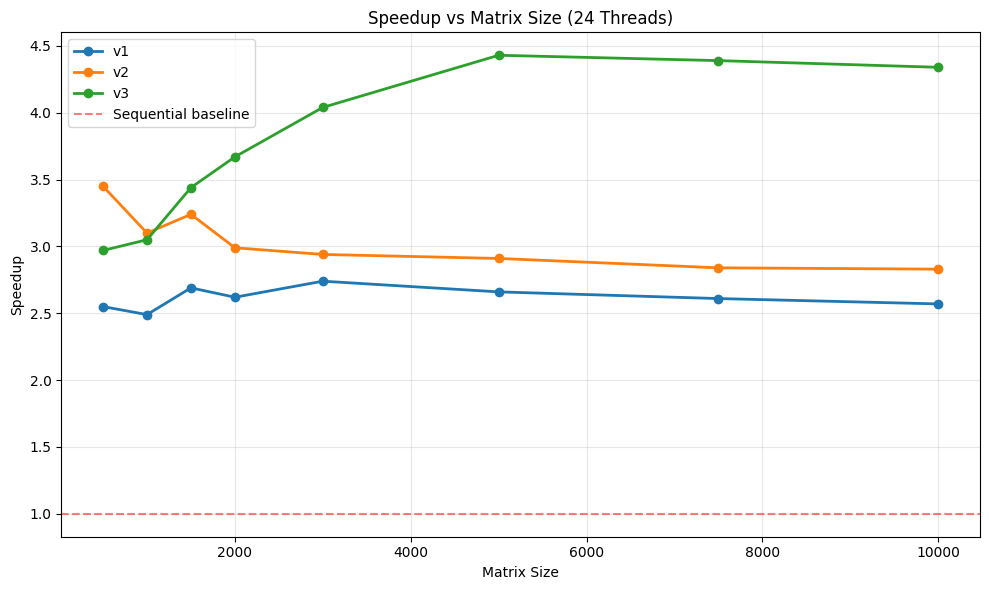

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('laplace_performance.csv')

# Filter for only 12 threads data
df_12threads = df[df['Thread_Count'] == 24]

# Create a simple plot
plt.figure(figsize=(10, 6))

# Plot each implementation
for impl in ['v1', 'v2', 'v3']:
    data = df_12threads[df_12threads['Implementation'] == impl]
    data = data.sort_values('Matrix_Size')
    plt.plot(data['Matrix_Size'], data['Speedup'], 
             marker='o', label=impl, linewidth=2)

# Plot sequential baseline
plt.axhline(y=1.0, color='red', linestyle='--', 
            alpha=0.5, label='Sequential baseline')

# Add labels and title
plt.xlabel('Matrix Size')
plt.ylabel('Speedup')
plt.title('Speedup vs Matrix Size (24 Threads)')
plt.grid(True, alpha=0.3)
plt.legend()

# Save the plot
plt.tight_layout()
plt.savefig('speedup_vs_matrixsize_24threads.png', dpi=300)
print("Plot saved successfully!")


FileNotFoundError: [Errno 2] No such file or directory: '/home/claude/laplace_solver_by_matrix.png'

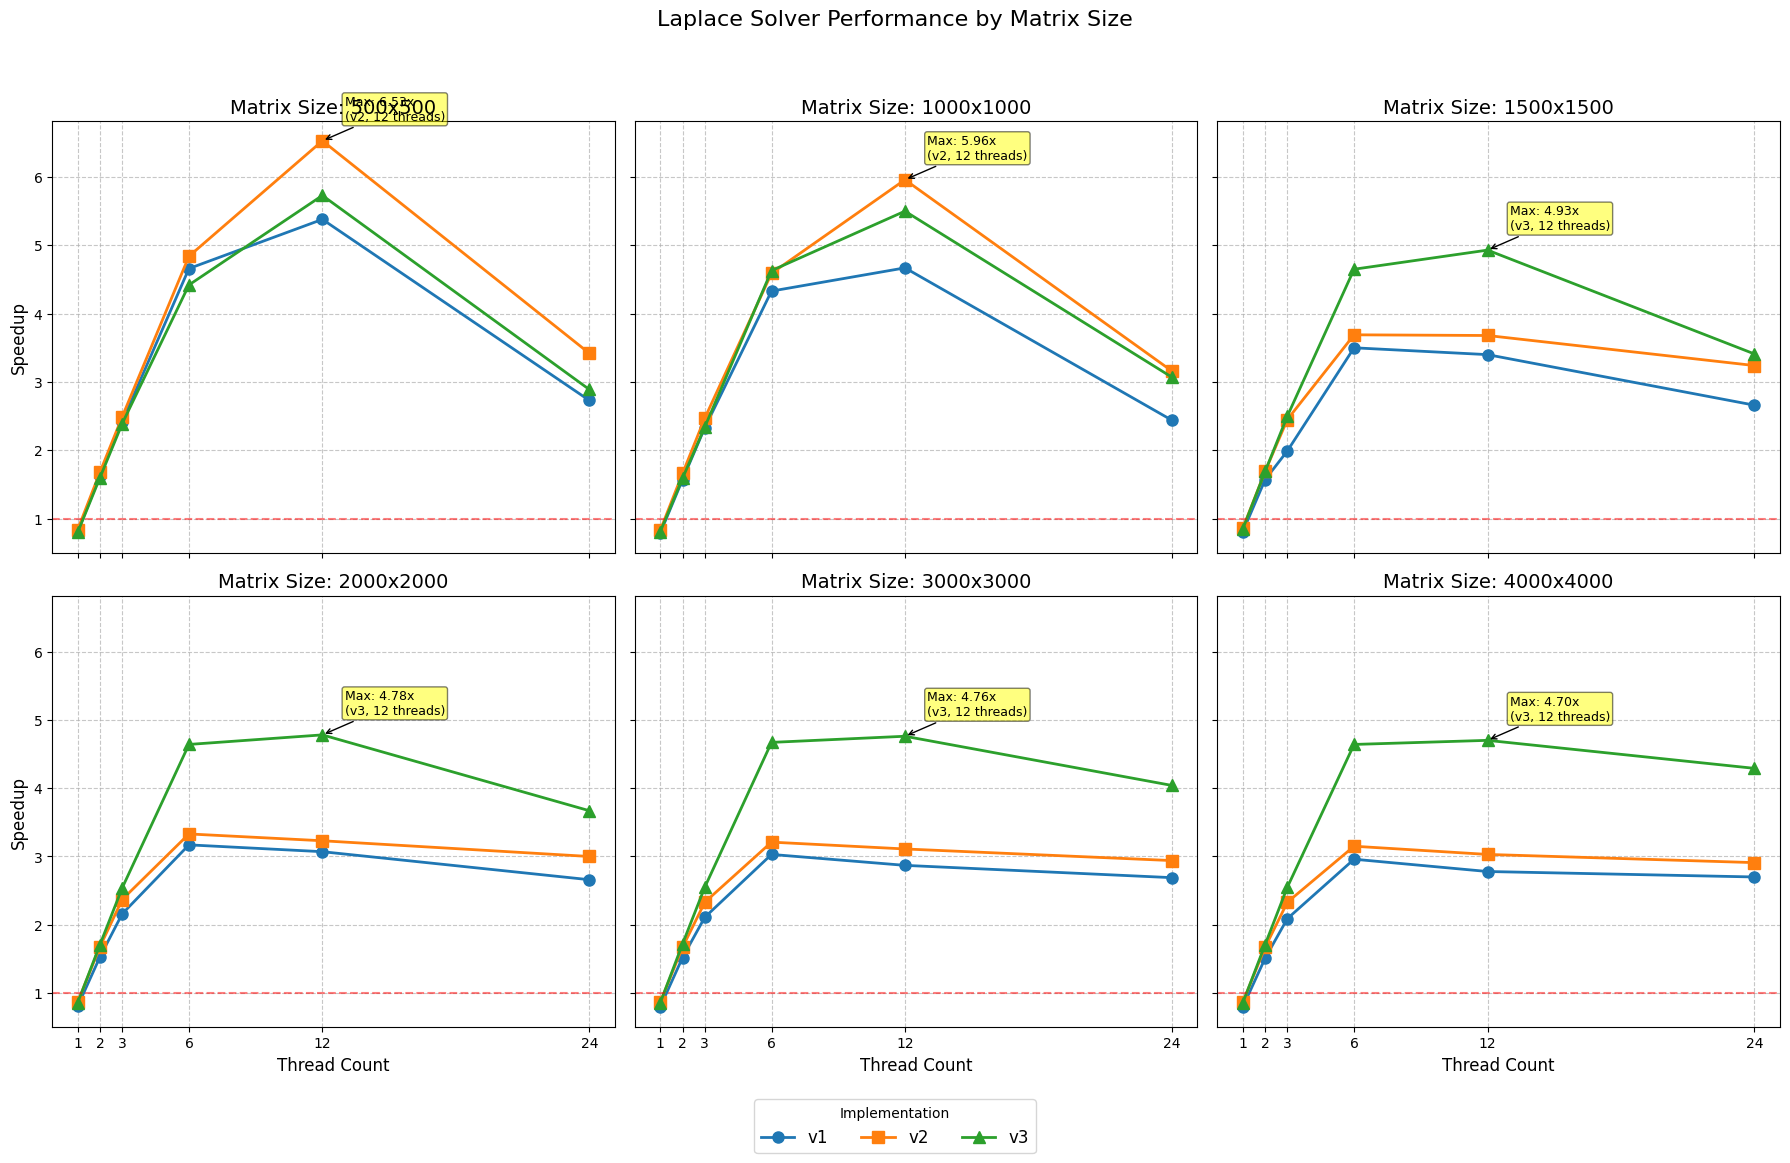

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
df = pd.read_csv('laplace_performance.csv')

# Filter out the Sequential implementation
df_parallel = df[df['Implementation'] != 'Sequential']

# Define colors and markers for implementations
colors = {'v1': '#1f77b4', 'v2': '#ff7f0e', 'v3': '#2ca02c'}
markers = {'v1': 'o', 'v2': 's', 'v3': '^'}
implementations = sorted(df_parallel['Implementation'].unique())
matrix_sizes = sorted(df_parallel['Matrix_Size'].unique())

# Create a grid of subplots - one for each matrix size
fig, axes = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True)
axes = axes.flatten()

# Plot each matrix size in its own subplot
for i, matrix_size in enumerate(matrix_sizes):
    ax = axes[i]
    
    # Add title for each subplot
    ax.set_title(f'Matrix Size: {matrix_size}x{matrix_size}', fontsize=14)
    
    # Plot each implementation
    for implementation in implementations:
        data = df_parallel[(df_parallel['Matrix_Size'] == matrix_size) & 
                          (df_parallel['Implementation'] == implementation)]
        
        ax.plot(data['Thread_Count'], data['Speedup'], 
                marker=markers[implementation], 
                color=colors[implementation],
                linewidth=2,
                markersize=8,
                label=f"{implementation}")
    
    # Add grid and other elements
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xticks([1, 2, 3, 6, 12, 24])
    
    # Add sequential baseline
    ax.axhline(y=1, color='r', linestyle='--', alpha=0.5)
    
    # Add labels
    if i >= 3:  # Only for bottom row
        ax.set_xlabel('Thread Count', fontsize=12)
    if i % 3 == 0:  # Only for first column
        ax.set_ylabel('Speedup', fontsize=12)
        
    # Find the maximum speedup for this matrix size
    max_speedup = df_parallel[df_parallel['Matrix_Size'] == matrix_size]['Speedup'].max()
    max_row = df_parallel[(df_parallel['Matrix_Size'] == matrix_size) & 
                          (df_parallel['Speedup'] == max_speedup)]
    
    # Annotate the maximum speedup
    ax.annotate(f'Max: {max_speedup:.2f}x\n({max_row["Implementation"].values[0]}, {int(max_row["Thread_Count"].values[0])} threads)',
                xy=(max_row["Thread_Count"].values[0], max_speedup),
                xytext=(max_row["Thread_Count"].values[0]+1, max_speedup+0.3),
                arrowprops=dict(arrowstyle='->'), fontsize=9,
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.5))

# Remove the unused subplot if any
if len(matrix_sizes) < len(axes):
    for j in range(len(matrix_sizes), len(axes)):
        fig.delaxes(axes[j])

# Create a common legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.02), 
           ncol=len(implementations), fontsize=12, title='Implementation')

# Add a common title
plt.suptitle('Laplace Solver Performance by Matrix Size', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.08, 1, 0.95])

# Save the figure
plt.savefig('/home/claude/laplace_solver_by_matrix.png', dpi=300, bbox_inches='tight')

print("Matrix comparison plot saved as 'laplace_solver_by_matrix.png'")